#### 1. Importing the libraries

In [11]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

#### 2. Creating the data with (make_classification)

In [3]:
data = make_classification(n_samples=1000,n_features=4,n_informative=2,n_redundant=2,n_classes=2,random_state=2)

# Separe the features and target from data
X, y = data

# Splitting X, y
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.25)

#### 3. Creating the model 

In [4]:
# Creating the Tree model 
model = DecisionTreeClassifier(max_depth=4, criterion='entropy',splitter='best')

# Training the model
model.fit(x_train,y_train)

# Predict for x_test data
y_predict = model.predict(x_test)

#### 4. Checking the metrics

In [5]:
# Return the score of the model
print(model.score(x_test,y_test))

# Return the confusion_matrix
print(confusion_matrix(y_test, y_predict))

0.852
[[120   8]
 [ 29  93]]


#### 5. Plotting the tree

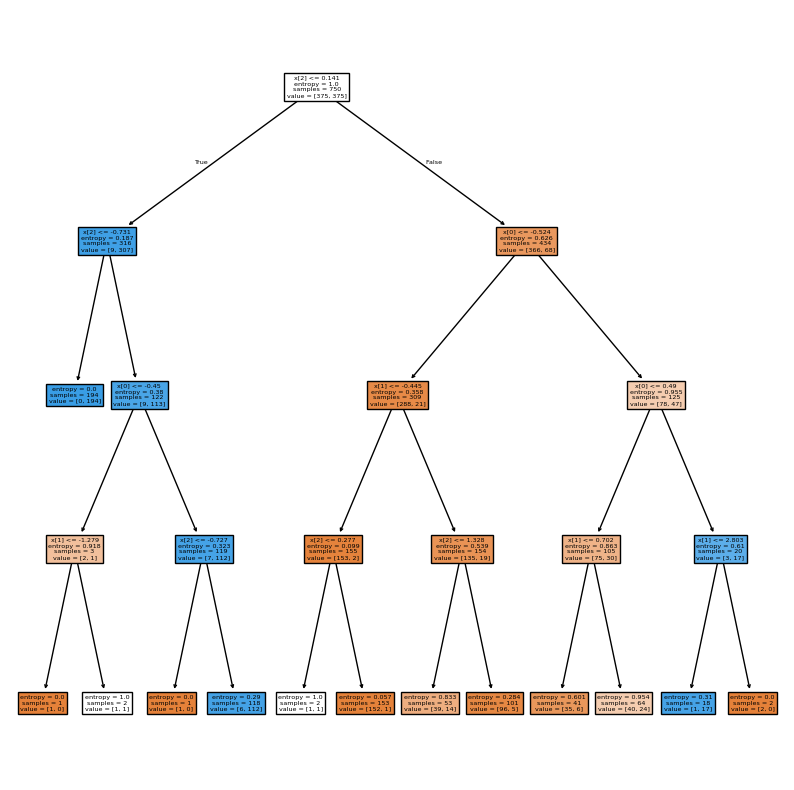

In [6]:
plt.figure(figsize=(10, 10))
plot_tree(model, filled=True)
plt.show()

#### 6. Optimization of hyperparametrers with 'GridSearchCV'

In [7]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3,4,5,6,7,8,9],
    'min_samples_split': [10, 20,30, 40,50, 60],
    'min_samples_leaf': [10,20,30,40,50,60,70]
}

In [8]:
# Usamos GridSearchCV para encontrar la mejor combinación
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy',verbose=1)
grid_search.fit(x_train, y_train)


Fitting 5 folds for each of 588 candidates, totalling 2940 fits


c:\Users\Usuario\Documents\Proyectos\Training\Lib\site-packages\numpy\ma\core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(criterion='entropy', max_depth=4),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 6, 7, 8, 9],
                         'min_samples_leaf': [10, 20, 30, 40, 50, 60, 70],
                         'min_samples_split': [10, 20, 30, 40, 50, 60]},
             scoring='accuracy', verbose=1)

In [9]:
# Show the best params and score
print(grid_search.best_params_)
print(grid_search.best_score_)

{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 10, 'min_samples_split': 10}
0.9106666666666667


In [10]:
# Reassigning the best model
best_model = grid_search.best_estimator_
# Re predict with the best model
y_best_predict = best_model.predict(x_test)

In [13]:
print(accuracy_score(y_test,y_best_predict))
print(confusion_matrix(y_test,y_best_predict))

0.864
[[119   9]
 [ 25  97]]
